In [1]:
using DynamicalSystems
using OrdinaryDiffEq
using DifferentialEquations
using StaticArrays
using CairoMakie

In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [122]:
tspan = (0.0, 20000.0)

u0 = SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
a = 1.0; b = 3.0; c = 1.0; d = 5.0

xr = -1.6; r = 0.01; s = 5.0; I = 4.0; xv = 2.0

k1 = -0.27108986294801735; k2 = -0.17
# Bautin bifurcation point at (:k, :k1) ≈ (0.6189496277966194, -0.27108986294801735).
k = 0.6189496277966194
p = SA[a, b, c, d, s, xr, r,  I, xv, k1, k2, k];

In [123]:
ds = ContinuousDynamicalSystem(HR, u0, p)

6-dimensional continuous dynamical system
 state:       [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, -0.27109, -0.17, 0.61895]

In [124]:
tr = trajectory(ds, tspan[2], Ttr = tspan[2], Δt = 0.01, diffeq = (alg = Vern9(), adaptive = false, dt = 0.01));

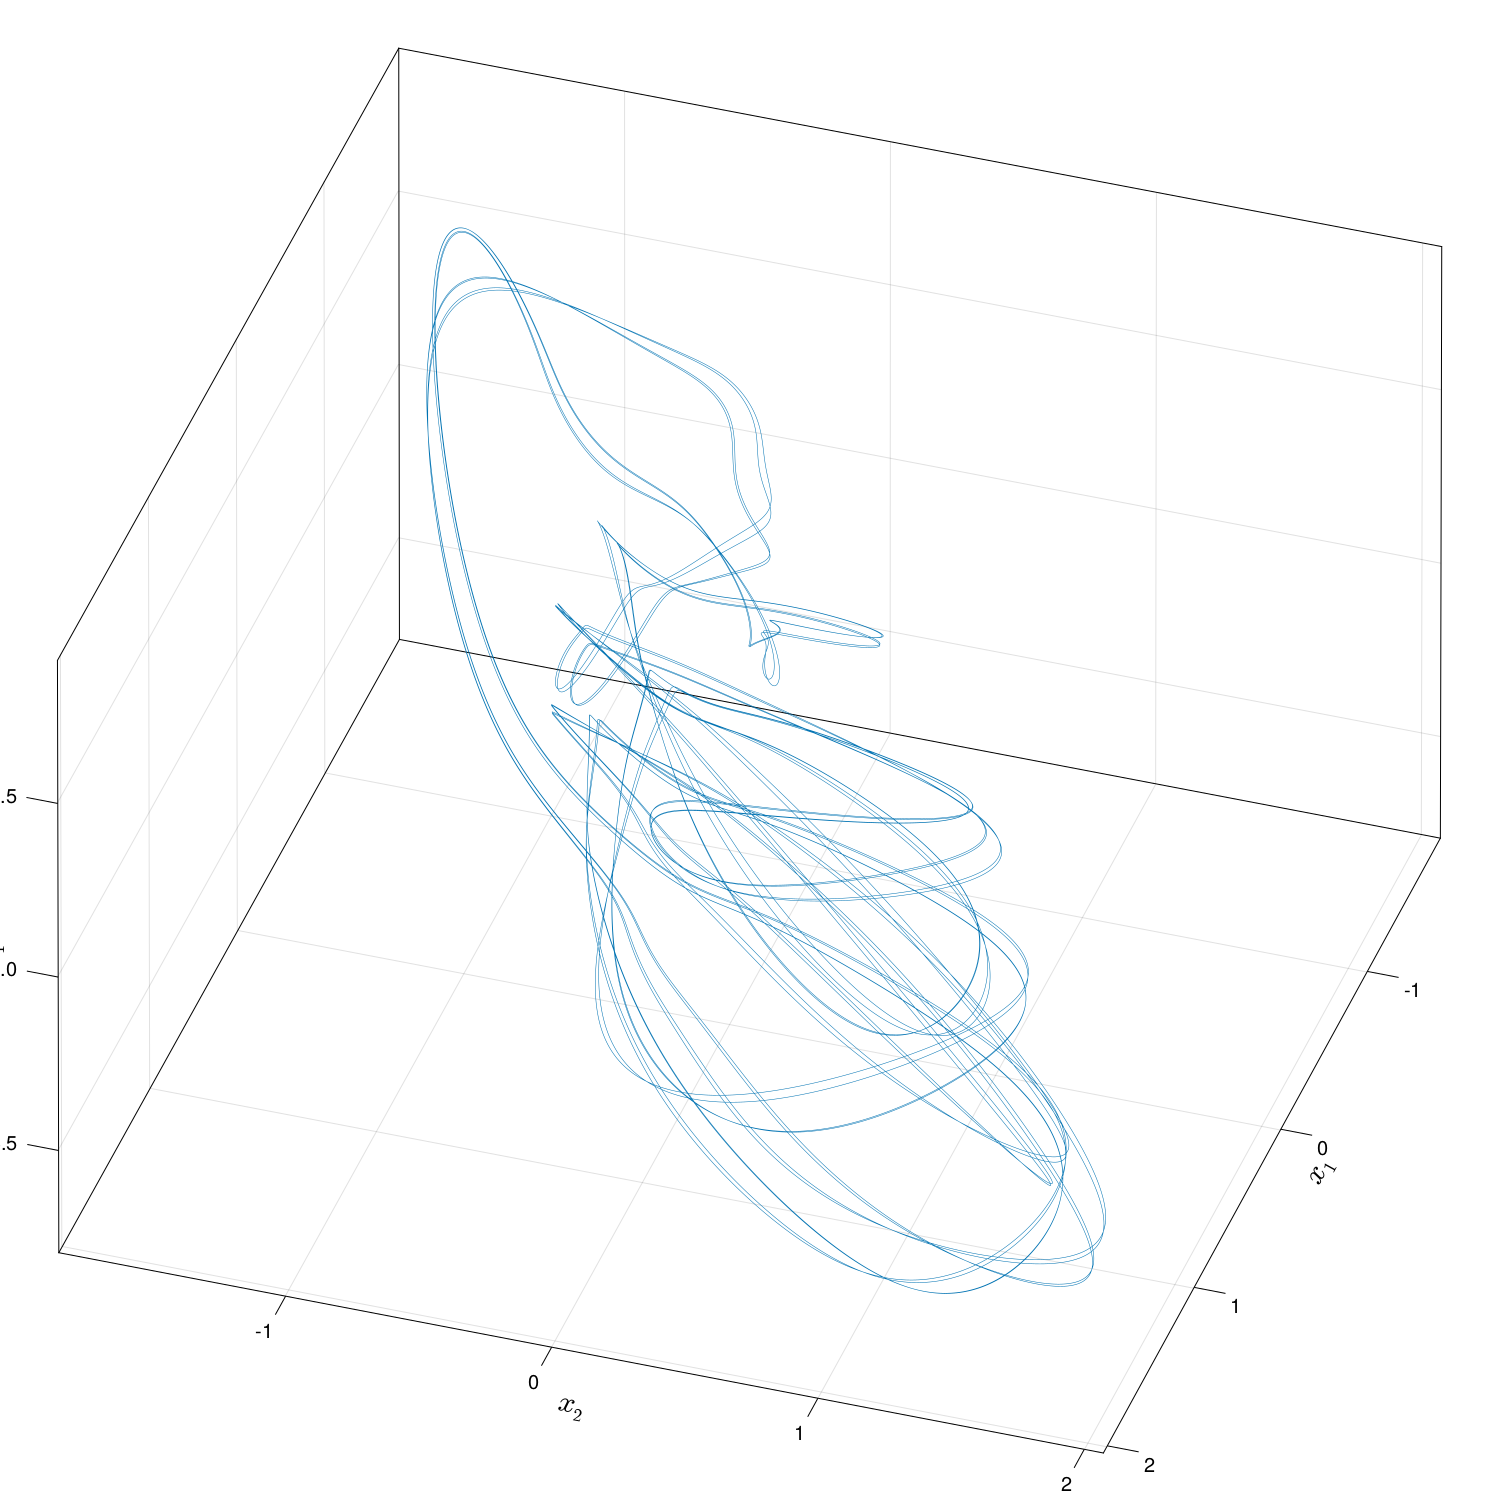

In [125]:
f = Figure(resolution = (1500, 1500))

ts, tf = 1, 500000

ax = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"z_1",  elevation = 0.2pi, azimuth = 0.1pi,
                xlabelsize = 30, ylabelsize = 30, zlabelsize = 30,
                xticklabelsize = 20, yticklabelsize = 20, zticklabelsize = 20  )
            
lines!(ax, tr[ts: tf, 1], tr[ts: tf, 4], tr[ts: tf, 3], linewidth = 0.5)

f

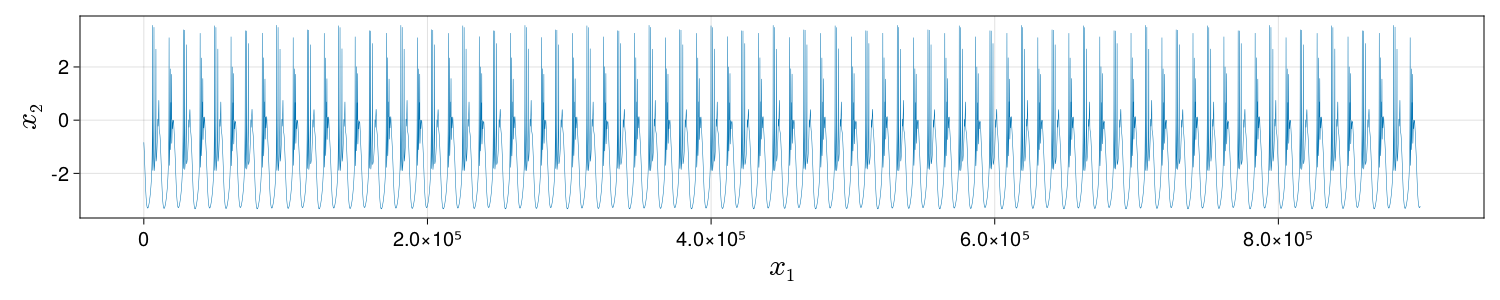

In [135]:
f = Figure(resolution = (1500, 300))

ts, tf = 1, 900000

ax = Axis(f[1, 1], xlabel = L"x_1", ylabel = L"x_2",
                xlabelsize = 30, ylabelsize = 30,
                xticklabelsize = 20, yticklabelsize = 20  )
            
lines!(ax, tr[ts: tf, 1]+tr[ts: tf, 4], linewidth = 0.5)

f

In [136]:
spectrum = lyapunovspectrum(ds, tspan[2]; Ttr = tspan[2] / 2, Δt = 1, diffeq = (alg = Vern9(), adaptive = false, dt = 0.01))

6-element Vector{Float64}:
  -3.4504242570085465e-5
  -0.0005187602790614088
  -0.024553549076505157
  -0.06480203819303787
  -8.765262346941618
 -10.4630413459114